In [1]:
# %%writefile xxx.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import QUANTAXIS as QA

import tools.Sample_Tools as smpl
from base.JuUnits import parallal_task,task_chunk_split
from base.JuUnits import excute_for_multidates

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [27]:

def get_RSJ_by_code(code,st='2016-03-01',en='2020-12-31',fr=QA.FREQUENCE.FIVE_MIN):
    def calc(varaints_daily):
        close = varaints_daily.close
        ret = (close/close.shift(1) - 1).dropna()
        #######已实现波动###########################
        #已实现方差 RealizedVolatility
        r_2 = np.power(ret,2)
        rv = r_2.sum()
        
        if rv==0:
            return 0,0,0,0

        #好波
        rv_up = r_2[ret>0].sum()
        #坏波
        rv_down = r_2[ret<0].sum()

        # 有符号跳跃方差
        sj = rv_up - rv_down
        # 相对有符号的跳跃方差,
        rsj = sj / rv

        n = len(ret)
        # 已实现的偏度（RSK）
        rsk = (np.power(n,0.5) * np.power(ret,3).sum()) / np.power(rv,3.0/2.0)
        # 已实现的峰度（RKT）
        rkt = (n * np.power(ret,4).sum()) / np.power(rv,2)
        ##########################################
        
        ##########################################
        volatility = ret.rolling(5).std()
        # 模糊性
        fuzziness = volatility.rolling(5).std()
        # 模糊关联度: 模糊度与成交金额
        fuzz_amount = fuzziness.corr(varaints_daily.amount)
        # 模糊金额比：考察模糊性较大时，成交金额是否会偏大，即计算模糊性较大时的平均分钟成交金额，与日内全部时间的平均分钟成交金额的比值
        fuzz_avg = fuzziness.mean(skipna=True)
        cond = np.where(fuzziness>fuzz_avg,1,0)
        # fuzz_above_amount = (varaints_daily.amount * cond).sum()
        cond = np.where(fuzziness,1,0)
        fuzz_amount_ratio = cond
        print(fuzziness)
        print(varaints_daily.amount)
        print(cond)
        return rv,rsj,rsk,rkt
    

    stock_df = smpl.get_data(code, start=st, end=en, gap=None, freq=fr)
    if stock_df is None:
        return None
    stock_df = stock_df.data
    columns = ['close','volume','amount']
    var = stock_df[columns]
    var_unindex = var.reset_index()

    res = var_unindex[columns].groupby(var_unindex.datetime.dt.to_period("D"),group_keys=False).apply(lambda x: calc(x))
    res_df = pd.DataFrame(res.to_list(),index=pd.MultiIndex.from_arrays([res.index.to_timestamp(),[code]*len(res.index)]),columns=['rv','rsj','rsk','rkt'])
    
    return res_df

# df_tmp = pd.DataFrame()
# for code in ['000001','000002']:
#     res = get_RSJ_by_code(code)
#     if res is None:
#         continue
#     df_tmp = pd.concat([df_tmp,res],axis=0)

get_RSJ_by_code('000001')

1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.000185
10    0.000313
11    0.000569
12    0.000574
13    0.000491
14    0.000255
15    0.000395
16    0.000532
17    0.000460
18    0.000345
19    0.000336
20    0.000335
21    0.000362
22    0.000378
23    0.000389
24    0.000480
25    0.000570
26    0.000604
27    0.000573
28    0.000229
29    0.000301
30    0.000260
31    0.000177
32    0.000177
33    0.000165
34    0.000133
35    0.000176
36    0.000597
37    0.000843
38    0.000917
39    0.000823
40    0.000469
41    0.000427
42    0.000405
43    0.000354
44    0.000169
45    0.000457
46    0.000613
47    0.000999
Name: close, dtype: float64
0     33448644.0
1     16271316.0
2     11619984.0
3      6248136.0
4      7702368.0
5     15692200.0
6      4418656.0
7      3768144.0
8      5654840.0
9      6000944.0
10     4902016.0
11     6573616.0
12     5870872.0
13     3434680.0
14     3772592.0
15     66565

KeyboardInterrupt: 

In [6]:
codes = smpl.get_codes_by_market(sse='all',only_main=True,filter_st=True)
# codes = codes[0:14]

worker=8
task = task_chunk_split(codes, worker)

results = parallal_task(worker, multi_test, task)


Now in the main code. Process name is: base.JuUnits
base.JuUnits, subpid:23128  pid:9696


  0%|          | 0/8 [00:00<?, ?it/s]

ValueError: 4 columns passed, passed data had 3 columns

In [7]:
def multi_test(codes):
    import numpy as np
    import pandas as pd
    import QUANTAXIS as QA
    import tools.Sample_Tools as smpl

    
    def get_RSJ_by_codex(code,st='2016-01-04',en='2020-12-31',fr=QA.FREQUENCE.FIVE_MIN):
        def calc_rvx(varaint_daily):
            ret = (varaint_daily/varaint_daily.shift(1) - 1).dropna()
            r_2 = np.power(ret,2)
            #已实现方差
            rv = r_2.sum()

            if rv==0:
                return 0,0,0,0

            #好波
            rv_up = r_2[ret>0].sum()
            #坏波
            rv_down = r_2[ret<0].sum()

            # 有符号跳跃方差
            sj = rv_up - rv_down
            # 相对有符号的跳跃方差,
            rsj = sj / rv

            n = len(ret)
            # 已实现的偏度（RSK）
            rsk = (np.power(n,0.5) * np.power(ret,3).sum()) / np.power(rv,3.0/2.0)
            # 已实现的峰度（RKT）
            rkt = (n * np.power(ret,4).sum()) / np.power(rv,2)
            return rv,rsj,rsk,rkt

        stock_df = smpl.get_data(code, start=st, end=en, gap=None, freq=fr)
        if stock_df is None:
            return None
        stock_df = stock_df.data
        
        var = stock_df.close
        var_unindex = var.reset_index()

        res = var_unindex[var.name].groupby(var_unindex.datetime.dt.to_period("D"),group_keys=False).apply(lambda x: calc_rvx(x))
        res_df = pd.DataFrame(res.to_list(),index=pd.MultiIndex.from_arrays([res.index.to_timestamp(),[code]*len(res.index)]),columns=['rv','rsj','rsk','rkt'])

        return res_df

    df_tmp = pd.DataFrame()
    for code in codes:
        res = get_RSJ_by_codex(code)
        if res is None:
            continue
        df_tmp = pd.concat([df_tmp,res],axis=0)
    return df_tmp

In [ ]:
res_final_df = pd.concat(results).sort_index()
res_final_df.index.names = ['date', 'code']
# res_final_df.index=pd.MultiIndex.from_arrays([res_final_df.index.get_level_values(0).to_timestamp(),res_final_df.index.get_level_values(1)])

In [ ]:
from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)

tail = False
if tail:
    file = 'all_tail_qfq'
else:
    file = 'all_train_qfq'
    
df_all = load_cache(file,cache_type=CACHE_TYPE.STOCK).sort_index()
smpl.optimize_data_type(df_all)

data_ = df_all

year1 = '2020'
year2 = '2020'
data_ = df_all.loc[year1+'-01-03':year2+'-12-31']
codes = data_.index.get_level_values(1).unique()
dates = data_.index.get_level_values(0).unique()


ret = smpl.get_forward_return(data_,'close')
ret.name = 'ret_forward'
ret[np.abs(ret)>0.15]=np.nan

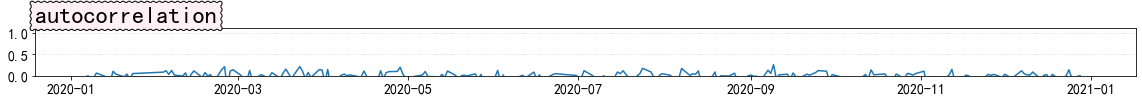

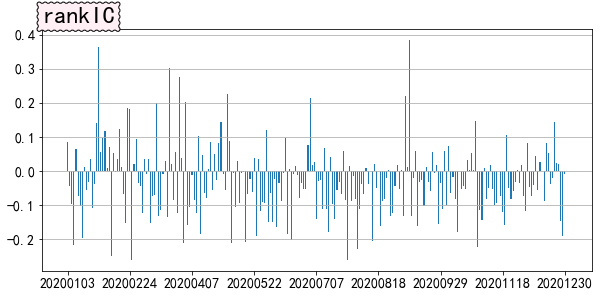

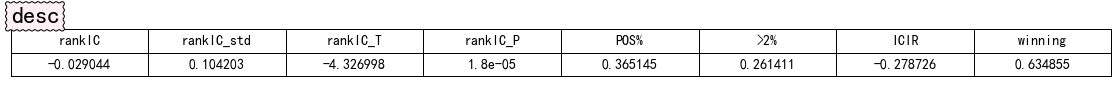

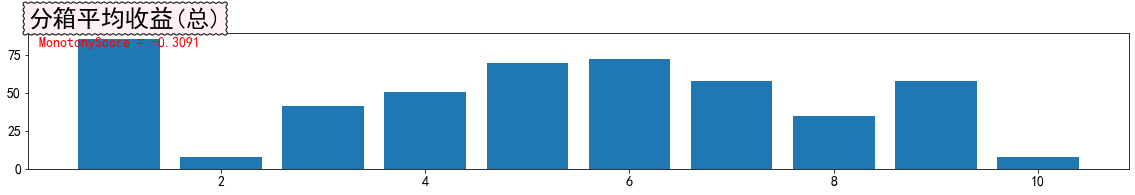

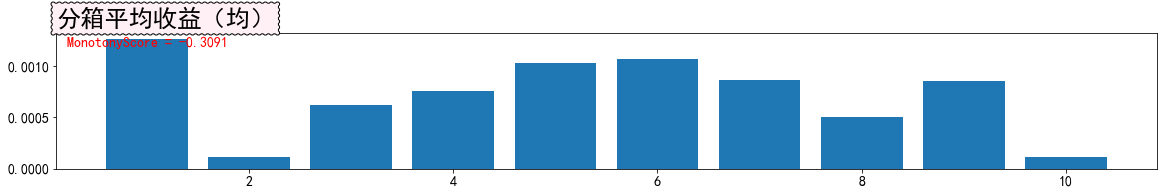

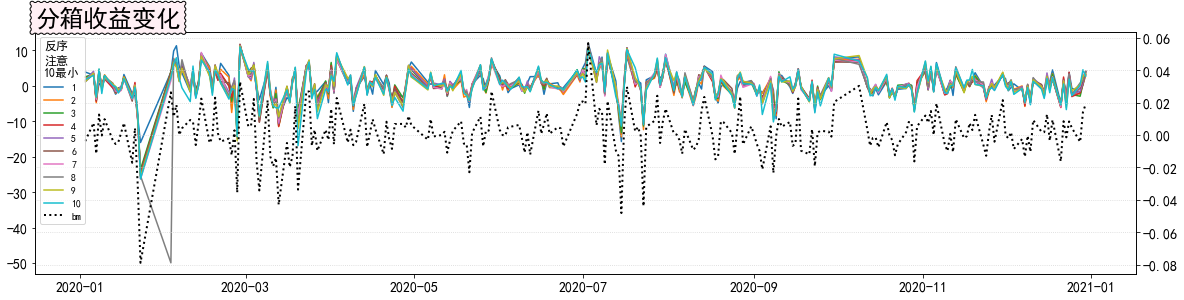

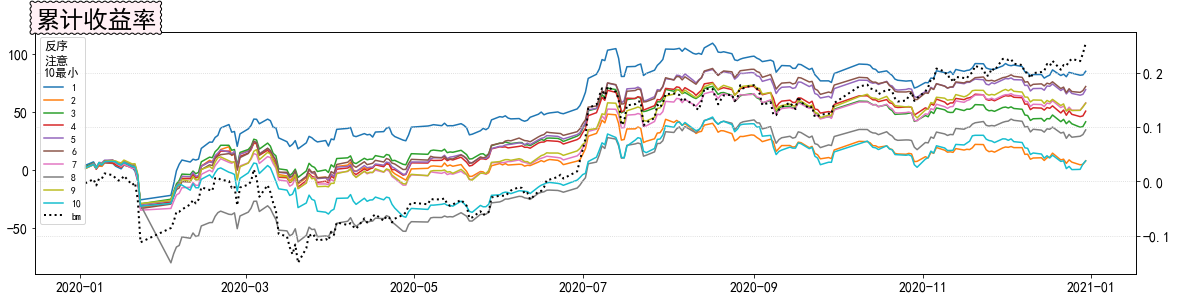

Wall time: 5 s


In [73]:
%%time
from tools.Test_Tools_Simple import FactorTest

# %load_ext autoreload
# %autoreload 1
# %aimport tools.Test_Tools_Simple

fa = pd.DataFrame(res_final_df['rsj'].loc[year1+'-01-03':year2+'-12-31']).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()

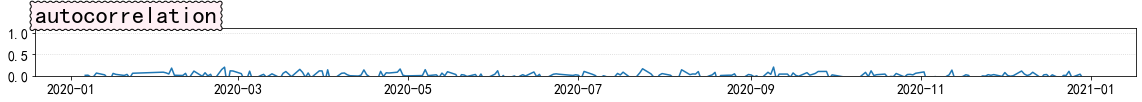

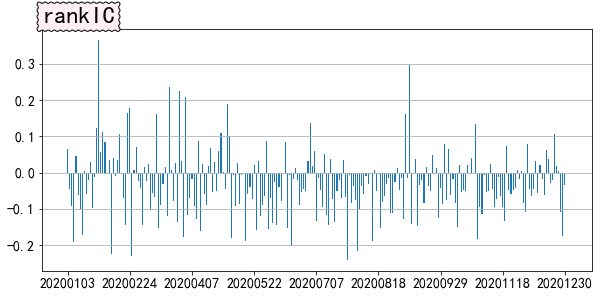

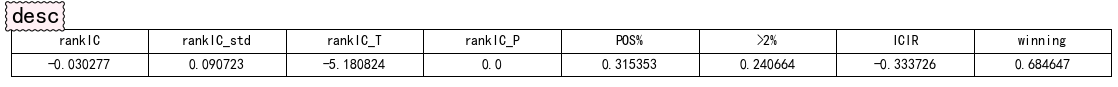

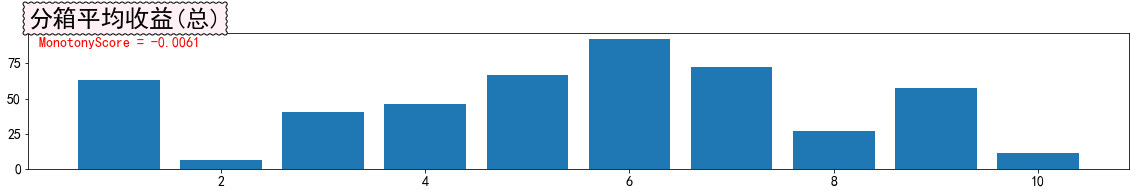

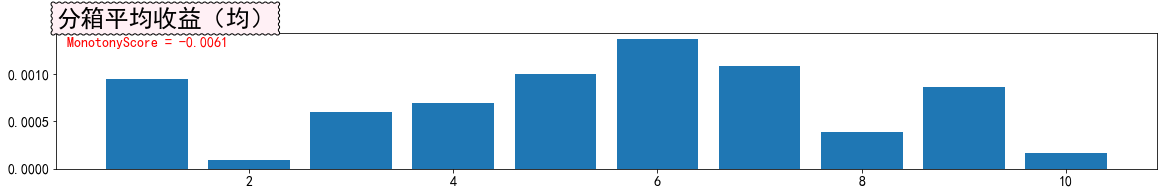

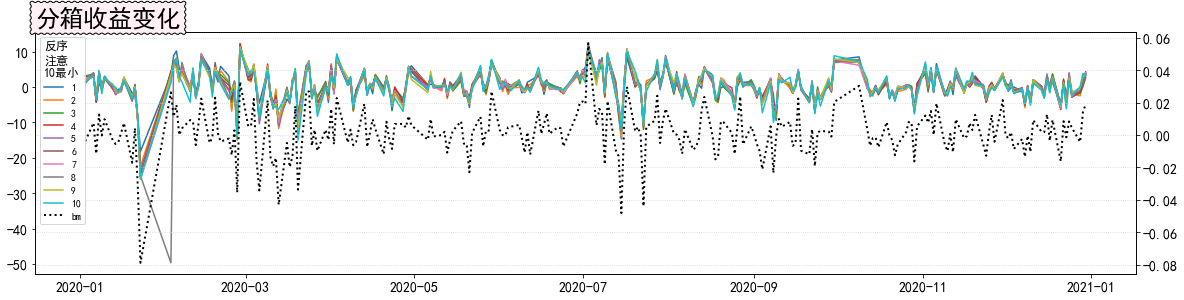

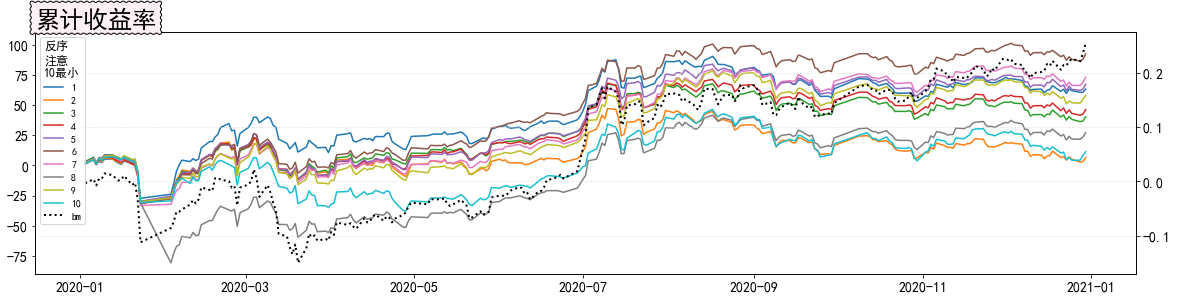

In [74]:
fa = pd.DataFrame(res_final_df['rsk'].loc[year1+'-01-03':year2+'-12-31']).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()

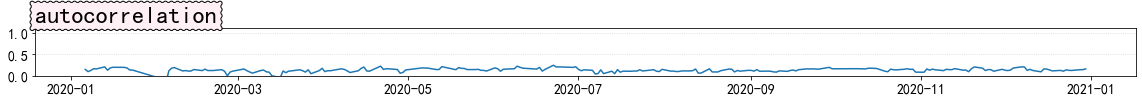

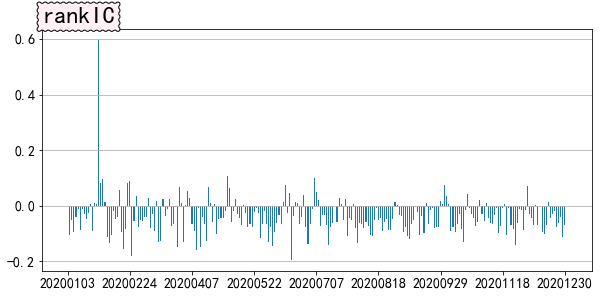

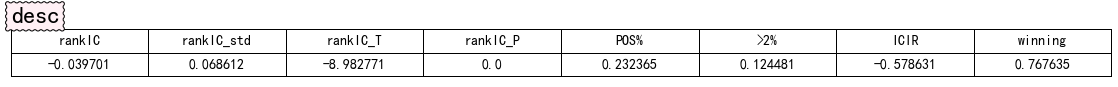

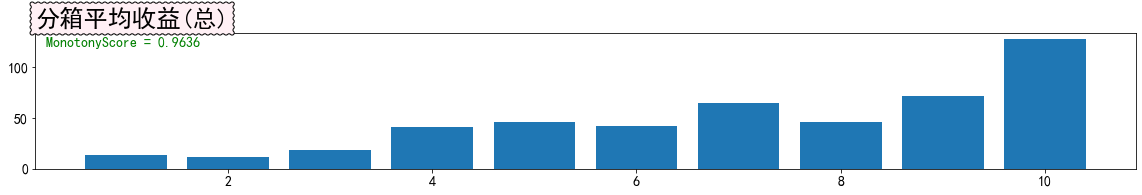

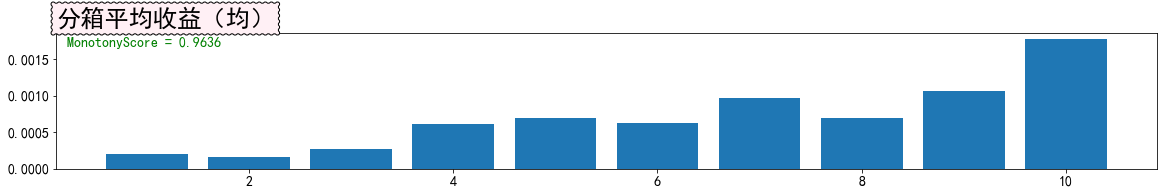

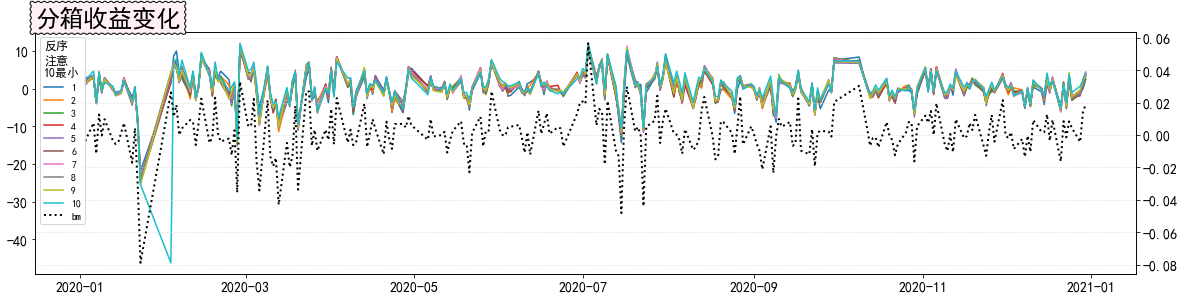

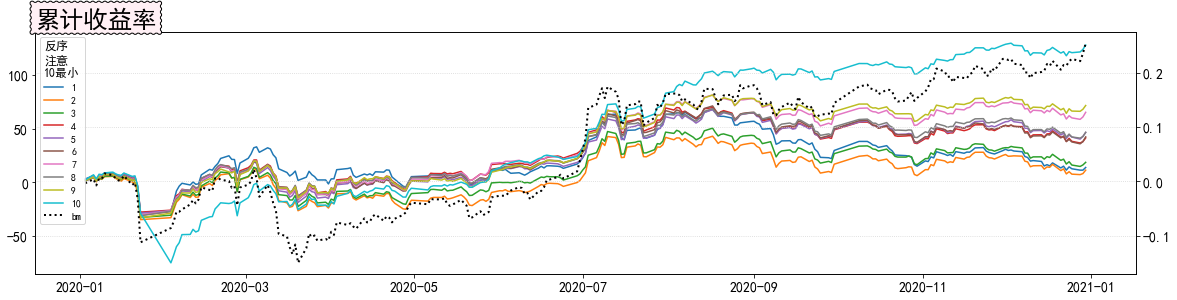

In [75]:
fa = pd.DataFrame(res_final_df['rkt'].loc[year1+'-01-03':year2+'-12-31']).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()